**Import the relevant libraries**

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
import warnings

warnings.filterwarnings('ignore')

**Load the data**

In [5]:
raw_data = pd.read_csv(r'C:\Users\user\Downloads\startups\startups\crunchbase.csv')

In [6]:
raw_data.head(10)

,company_id,category_code,country_code,state_code,average_funded,total_rounds,average_participants,products_number,offices,acquired_companies,mba_degree,phd_degree,ms_degree,other_degree,ipo,is_acquired,is_closed,age
0,c:1,web,USA,other,1.325000e+07,3,3.0000,2.0,2.0,NaN,5.0,1.0,3.0,18.0,False,False,False,2998.0
1,c:1001,web,USA,California,5.000000e+06,1,3.0000,1.0,1.0,NaN,1.0,1.0,5.0,11.0,False,True,False,679.0
2,c:10014,mobile,USA,California,NaN,1,1.0000,1.0,1.0,1.0,NaN,1.0,2.0,6.0,False,True,False,943.0
3,c:10015,health,USA,California,1.361384e+07,5,3.8000,NaN,1.0,NaN,4.0,NaN,2.0,12.0,False,False,False,2284.0
4,c:100155,cleantech,USA,other,3.375098e+06,3,1.6667,NaN,1.0,NaN,2.0,1.0,3.0,6.0,False,False,False,4018.0
5,c:10018,analytics,USA,California,1.100000e+07,3,4.3333,NaN,1.0,NaN,4.0,NaN,NaN,13.0,False,False,False,2922.0
6,c:100189,mobile,other,other,2.500000e+05,1,2.0000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,3714.0
7,c:10021,network_hosting,other,other,NaN,1,1.0000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2192.0
8,c:100228,education,USA,other,1.000000e+05,1,0.0000,NaN,3.0,NaN,NaN,NaN,NaN,NaN,False,False,False,1188.0
9,c:100238,medical,USA,other,5.650000e+06,2,0.5000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2922.0


**Data Preprocessing**

**convert the age column from days to years**

In [9]:
print(raw_data[['age']].head(10))

      age
0  2998.0
1   679.0
2   943.0
3  2284.0
4  4018.0
5  2922.0
6  3714.0
7  2192.0
8  1188.0
9  2922.0


In [10]:
#convert age from days to years and round to 2d.p.
raw_data['age_years'] = (raw_data['age'] / 365).round(2)

In [11]:
print(raw_data[['age', 'age_years']].head(10))

      age  age_years
0  2998.0       8.21
1   679.0       1.86
2   943.0       2.58
3  2284.0       6.26
4  4018.0      11.01
5  2922.0       8.01
6  3714.0      10.18
7  2192.0       6.01
8  1188.0       3.25
9  2922.0       8.01


**Get the detailed summary of the columns in the data**

In [13]:
#show missing values per column
raw_data.isnull().sum()

company_id                232
category_code            1477
country_code                0
state_code                  0
average_funded           3880
total_rounds                0
average_participants        0
products_number         27941
offices                  2377
acquired_companies      30455
mba_degree              23889
phd_degree              29243
ms_degree               25928
other_degree            16661
ipo                         0
is_acquired                 0
is_closed                   0
age                      7479
age_years                7479
dtype: int64

**Filter out companies that are older than 7 years or younger that 3 years**

In [15]:
#Filtering out companies younger than 3 years or older than 7 years will help me to focus on the core startup phase.
filtered_data = raw_data[(raw_data['age_years'] >= 3) & (raw_data['age_years'] <= 7)]

In [16]:
# Check the size of the new dataset
print(f"Original size: {raw_data.shape}")
print(f"Filtered size: {filtered_data.shape}")

Original size: (31984, 19)
Filtered size: (9421, 19)


In [17]:
filtered_data.head(20)

,company_id,category_code,country_code,state_code,average_funded,total_rounds,average_participants,products_number,offices,acquired_companies,mba_degree,phd_degree,ms_degree,other_degree,ipo,is_acquired,is_closed,age,age_years
3,c:10015,health,USA,California,1.361384e+07,5,3.8000,NaN,1.0,NaN,4.0,NaN,2.0,12.0,False,False,False,2284.0,6.26
7,c:10021,network_hosting,other,other,NaN,1,1.0000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2192.0,6.01
8,c:100228,education,USA,other,1.000000e+05,1,0.0000,NaN,3.0,NaN,NaN,NaN,NaN,NaN,False,False,False,1188.0,3.25
21,c:100607,games_video,USA,California,4.000000e+04,1,1.0000,NaN,1.0,NaN,1.0,NaN,2.0,NaN,False,False,False,1096.0,3.00
26,c:10075,web,USA,California,3.500000e+05,1,0.0000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2246.0,6.15
27,c:100756,education,other,other,5.595220e+05,1,1.0000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,1826.0,5.00
28,c:10076,advertising,USA,California,NaN,1,4.0000,NaN,2.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2314.0,6.34
29,c:10082,analytics,USA,California,3.100000e+06,1,4.0000,1.0,1.0,NaN,1.0,NaN,NaN,3.0,False,False,False,2192.0,6.01
34,c:10098,software,USA,other,2.800000e+05,1,0.0000,NaN,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,2441.0,6.69
37,c:101052,government,USA,other,9.125000e+04,2,4.0000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,1337.0,3.66


In [18]:
filtered_data.isnull().sum()

company_id                 0
category_code            132
country_code               0
state_code                 0
average_funded          1134
total_rounds               0
average_participants       0
products_number         7808
offices                  475
acquired_companies      9055
mba_degree              6947
phd_degree              8689
ms_degree               7540
other_degree            4557
ipo                        0
is_acquired                0
is_closed                  0
age                        0
age_years                  0
dtype: int64

**Create the status column**

The status column represents the overall outcome of a startup based on key business milestones.
A company is labeled as:

success if it has either gone public (IPO is True) or has been acquired (is_acquired is True) — indicating a strong business exit or growth milestone.

failure if it has either not gone public (IPO is False) or has closed down (is_closed is True) — suggesting it did not achieve a successful exit or ceased operations.

In [21]:
def status(row):
    if row['ipo'] or row['is_acquired']:
        return 'success'
    elif not row['ipo'] or row['is_closed']:
        return 'failure'
    else:
        return 'unknown'

In [22]:
filtered_data['status'] = filtered_data.apply(status, axis=1)

In [23]:
print(filtered_data['status'].value_counts())

status
failure    8631
success     790
Name: count, dtype: int64


In [24]:
filtered_data.head(10)

,company_id,category_code,country_code,state_code,average_funded,total_rounds,average_participants,products_number,offices,acquired_companies,mba_degree,phd_degree,ms_degree,other_degree,ipo,is_acquired,is_closed,age,age_years,status
3,c:10015,health,USA,California,13613840.0,5,3.8,NaN,1.0,NaN,4.0,NaN,2.0,12.0,False,False,False,2284.0,6.26,failure
7,c:10021,network_hosting,other,other,NaN,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2192.0,6.01,failure
8,c:100228,education,USA,other,100000.0,1,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,False,False,False,1188.0,3.25,failure
21,c:100607,games_video,USA,California,40000.0,1,1.0,NaN,1.0,NaN,1.0,NaN,2.0,NaN,False,False,False,1096.0,3.00,failure
26,c:10075,web,USA,California,350000.0,1,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2246.0,6.15,failure
27,c:100756,education,other,other,559522.0,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,1826.0,5.00,failure
28,c:10076,advertising,USA,California,NaN,1,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,False,False,False,2314.0,6.34,failure
29,c:10082,analytics,USA,California,3100000.0,1,4.0,1.0,1.0,NaN,1.0,NaN,NaN,3.0,False,False,False,2192.0,6.01,failure
34,c:10098,software,USA,other,280000.0,1,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,False,False,False,2441.0,6.69,failure
37,c:101052,government,USA,other,91250.0,2,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,False,False,False,1337.0,3.66,failure


**Combine the education related columns into one**

In [26]:
filtered_data['number_degrees'] = (filtered_data['mba_degree'] + filtered_data['phd_degree'] + 
                                   filtered_data['ms_degree'] + filtered_data['other_degree'])

**At this point, I dropped the columns I no longer need**

In [28]:
#specify the columns to drop
columns_to_drop = ['age', 'mba_degree', 'phd_degree', 'ms_degree', 'other_degree']

In [29]:
#drop them from the data
filtered_data = filtered_data.drop(columns=columns_to_drop)

In [30]:
#check remaining columns
filtered_data.columns

Index(['company_id', 'category_code', 'country_code', 'state_code',
       'average_funded', 'total_rounds', 'average_participants',
       'products_number', 'offices', 'acquired_companies', 'ipo',
       'is_acquired', 'is_closed', 'age_years', 'status', 'number_degrees'],
      dtype='object')

In [31]:
filtered_data.head(10)

,company_id,category_code,country_code,state_code,average_funded,total_rounds,average_participants,products_number,offices,acquired_companies,ipo,is_acquired,is_closed,age_years,status,number_degrees
3,c:10015,health,USA,California,13613840.0,5,3.8,NaN,1.0,NaN,False,False,False,6.26,failure,NaN
7,c:10021,network_hosting,other,other,NaN,1,1.0,1.0,1.0,NaN,False,False,False,6.01,failure,NaN
8,c:100228,education,USA,other,100000.0,1,0.0,NaN,3.0,NaN,False,False,False,3.25,failure,NaN
21,c:100607,games_video,USA,California,40000.0,1,1.0,NaN,1.0,NaN,False,False,False,3.00,failure,NaN
26,c:10075,web,USA,California,350000.0,1,0.0,NaN,1.0,NaN,False,False,False,6.15,failure,NaN
27,c:100756,education,other,other,559522.0,1,1.0,NaN,1.0,NaN,False,False,False,5.00,failure,NaN
28,c:10076,advertising,USA,California,NaN,1,4.0,NaN,2.0,NaN,False,False,False,6.34,failure,NaN
29,c:10082,analytics,USA,California,3100000.0,1,4.0,1.0,1.0,NaN,False,False,False,6.01,failure,NaN
34,c:10098,software,USA,other,280000.0,1,0.0,NaN,1.0,NaN,False,False,False,6.69,failure,NaN
37,c:101052,government,USA,other,91250.0,2,4.0,NaN,1.0,NaN,False,False,False,3.66,failure,NaN


In [32]:
filtered_data.isnull().sum()

company_id                 0
category_code            132
country_code               0
state_code                 0
average_funded          1134
total_rounds               0
average_participants       0
products_number         7808
offices                  475
acquired_companies      9055
ipo                        0
is_acquired                0
is_closed                  0
age_years                  0
status                     0
number_degrees          9063
dtype: int64

**Handle missing values**

In [34]:
drop_missing_values = ['products_number', 'acquired_companies', 'number_degrees']

In [35]:
filtered_data = filtered_data.drop(columns=drop_missing_values)

In [36]:
filtered_data

,company_id,category_code,country_code,state_code,average_funded,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status
3,c:10015,health,USA,California,13613840.0,5,3.8,1.0,False,False,False,6.26,failure
7,c:10021,network_hosting,other,other,NaN,1,1.0,1.0,False,False,False,6.01,failure
8,c:100228,education,USA,other,100000.0,1,0.0,3.0,False,False,False,3.25,failure
21,c:100607,games_video,USA,California,40000.0,1,1.0,1.0,False,False,False,3.00,failure
26,c:10075,web,USA,California,350000.0,1,0.0,1.0,False,False,False,6.15,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31976,c:9975,web,other,other,798679.0,1,0.0,1.0,False,False,False,6.30,failure
31977,c:9977,mobile,USA,California,130000.0,1,0.0,1.0,False,False,True,5.62,failure
31981,c:9994,advertising,other,other,250000.0,2,1.0,NaN,False,False,False,5.34,failure
31982,c:9995,public_relations,USA,California,750000.0,1,0.0,1.0,False,False,False,6.17,failure


In [37]:
filtered_data['category_code'].unique()

array(['health', 'network_hosting', 'education', 'games_video', 'web',
       'advertising', 'analytics', 'software', 'government', 'ecommerce',
       'mobile', 'other', 'finance', 'photo_video', 'enterprise',
       'travel', 'social', 'transportation', 'hospitality',
       'public_relations', 'biotech', 'medical', 'messaging', 'hardware',
       'music', 'fashion', 'cleantech', 'security', 'sports', 'search',
       'nonprofit', 'consulting', 'real_estate', 'news', 'automotive',
       'legal', 'manufacturing', 'design', nan, 'local', 'semiconductor',
       'pets', 'nanotech'], dtype=object)

In [38]:
#fill the missing data points in category code with unknown
filtered_data['category_code'] = filtered_data['category_code'].fillna('unknown')

In [39]:
filtered_data['category_code'].unique()

array(['health', 'network_hosting', 'education', 'games_video', 'web',
       'advertising', 'analytics', 'software', 'government', 'ecommerce',
       'mobile', 'other', 'finance', 'photo_video', 'enterprise',
       'travel', 'social', 'transportation', 'hospitality',
       'public_relations', 'biotech', 'medical', 'messaging', 'hardware',
       'music', 'fashion', 'cleantech', 'security', 'sports', 'search',
       'nonprofit', 'consulting', 'real_estate', 'news', 'automotive',
       'legal', 'manufacturing', 'design', 'unknown', 'local',
       'semiconductor', 'pets', 'nanotech'], dtype=object)

**Print the probability distribution function to deal with outliers**

**Dealing with outliers in average funded**

<Axes: xlabel='average_funded', ylabel='Density'>

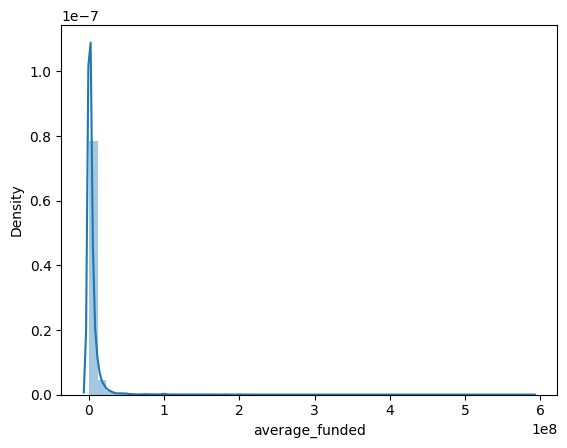

In [42]:
#before removing outliers
sns.distplot(filtered_data['average_funded'])

In [43]:
#the plot above shows that average_funded is an exponential variable
#i have to transform it and also deal with outliers
#start with the outliers using quantile method

In [44]:
#remove outliers
q = filtered_data['average_funded'].quantile(0.99)
data_1 = filtered_data[filtered_data['average_funded']<q]

<Axes: xlabel='average_funded', ylabel='Density'>

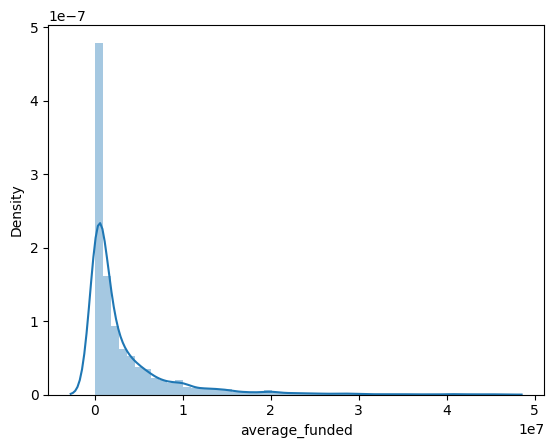

In [45]:
#after removing outliers in average_funded
sns.distplot(data_1['average_funded'])

**Dealing with outliers in total rounds**

<Axes: xlabel='total_rounds', ylabel='Density'>

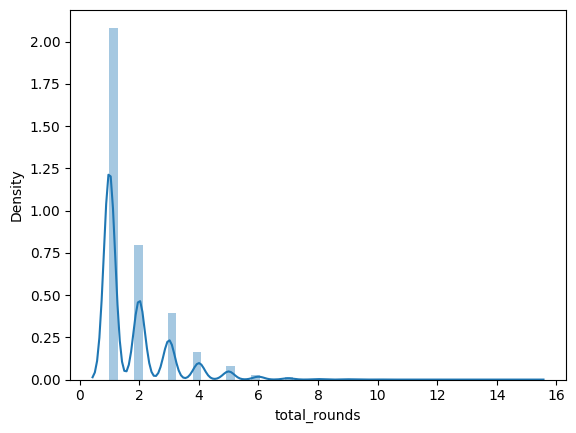

In [47]:
#before removing outliers
sns.distplot(filtered_data['total_rounds'])

In [48]:
#remove outliers
q = filtered_data['total_rounds'].quantile(0.99)
data_2 = data_1[data_1['total_rounds']<q]

<Axes: xlabel='total_rounds', ylabel='Density'>

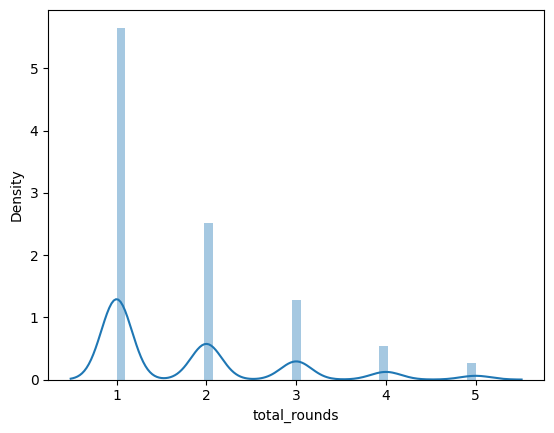

In [49]:
#after removing outliers from total rounds
sns.distplot(data_2['total_rounds'])

**Dealing with outliers in average participants**

<Axes: xlabel='average_participants', ylabel='Density'>

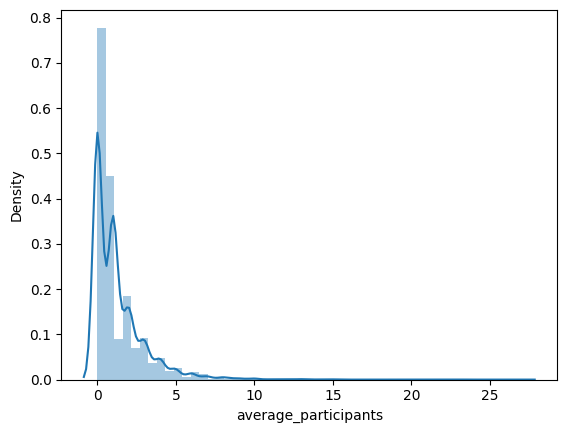

In [51]:
#before removing outliers
sns.distplot(filtered_data['average_participants'])

In [52]:
#remove outliers
q = filtered_data['average_participants'].quantile(0.99)
data_3 = data_2[data_2['average_participants']<q]

<Axes: xlabel='average_participants', ylabel='Density'>

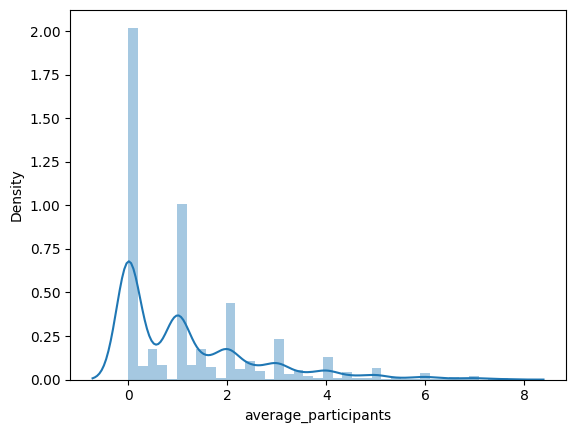

In [53]:
#after removing outliers from average participants
sns.distplot(data_3['average_participants'])

**Dealing with outliers in offices**

<Axes: xlabel='offices', ylabel='Density'>

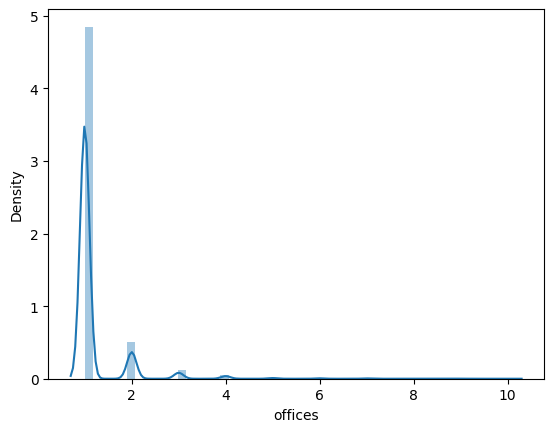

In [55]:
#before removing outliers
sns.distplot(filtered_data['offices'])

In [56]:
#remove outliers
q = filtered_data['offices'].quantile(0.99)
data_4 = data_3[data_3['offices']<q]

<Axes: xlabel='offices', ylabel='Density'>

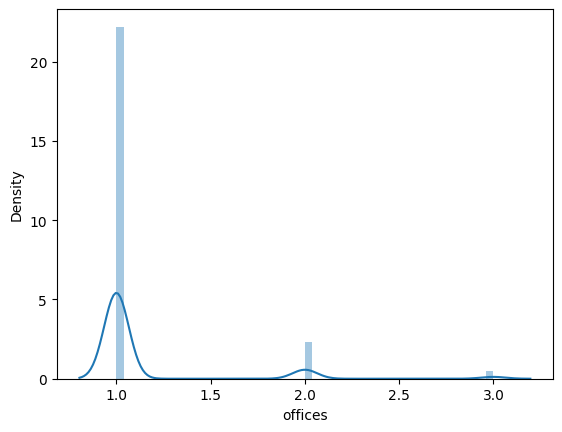

In [57]:
#after removing outliers in offices
sns.distplot(data_4['offices'])

**Create a cleaned data variable**

In [59]:
#create a clean data variable and reset the index
data_cleaned = data_4.reset_index(drop=True)

In [60]:
data_cleaned

,company_id,category_code,country_code,state_code,average_funded,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status
0,c:10015,health,USA,California,13613840.0,5,3.8,1.0,False,False,False,6.26,failure
1,c:100228,education,USA,other,100000.0,1,0.0,3.0,False,False,False,3.25,failure
2,c:100607,games_video,USA,California,40000.0,1,1.0,1.0,False,False,False,3.00,failure
3,c:10075,web,USA,California,350000.0,1,0.0,1.0,False,False,False,6.15,failure
4,c:100756,education,other,other,559522.0,1,1.0,1.0,False,False,False,5.00,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,750000.0,1,6.0,1.0,False,False,False,3.00,failure
7506,c:9975,web,other,other,798679.0,1,0.0,1.0,False,False,False,6.30,failure
7507,c:9977,mobile,USA,California,130000.0,1,0.0,1.0,False,False,True,5.62,failure
7508,c:9995,public_relations,USA,California,750000.0,1,0.0,1.0,False,False,False,6.17,failure


**Take the log of average funded because its an exponent**

In [62]:
log_average_funded = np.log(data_cleaned['average_funded'])
data_cleaned['log_average_funded'] = log_average_funded
data_cleaned

,company_id,category_code,country_code,state_code,average_funded,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,13613840.0,5,3.8,1.0,False,False,False,6.26,failure,16.426597
1,c:100228,education,USA,other,100000.0,1,0.0,3.0,False,False,False,3.25,failure,11.512925
2,c:100607,games_video,USA,California,40000.0,1,1.0,1.0,False,False,False,3.00,failure,10.596635
3,c:10075,web,USA,California,350000.0,1,0.0,1.0,False,False,False,6.15,failure,12.765688
4,c:100756,education,other,other,559522.0,1,1.0,1.0,False,False,False,5.00,failure,13.234838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,750000.0,1,6.0,1.0,False,False,False,3.00,failure,13.527828
7506,c:9975,web,other,other,798679.0,1,0.0,1.0,False,False,False,6.30,failure,13.590714
7507,c:9977,mobile,USA,California,130000.0,1,0.0,1.0,False,False,True,5.62,failure,11.775290
7508,c:9995,public_relations,USA,California,750000.0,1,0.0,1.0,False,False,False,6.17,failure,13.527828


In [63]:
#delete the average funded column
data_cleaned = data_cleaned.drop(['average_funded'], axis=1)
data_cleaned

,company_id,category_code,country_code,state_code,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,1.0,False,False,False,6.26,failure,16.426597
1,c:100228,education,USA,other,1,0.0,3.0,False,False,False,3.25,failure,11.512925
2,c:100607,games_video,USA,California,1,1.0,1.0,False,False,False,3.00,failure,10.596635
3,c:10075,web,USA,California,1,0.0,1.0,False,False,False,6.15,failure,12.765688
4,c:100756,education,other,other,1,1.0,1.0,False,False,False,5.00,failure,13.234838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,1.0,False,False,False,3.00,failure,13.527828
7506,c:9975,web,other,other,1,0.0,1.0,False,False,False,6.30,failure,13.590714
7507,c:9977,mobile,USA,California,1,0.0,1.0,False,False,True,5.62,failure,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,1.0,False,False,False,6.17,failure,13.527828


In [64]:
data_mapped = data_cleaned.copy()

**Map categorical variables to 0's and 1's**

In [66]:
# Map categorical binary variables to 1s and 0s
data_mapped['ipo'] = data_mapped['ipo'].map({True: 1, False: 0})
data_mapped['is_acquired'] = data_mapped['is_acquired'].map({True: 1, False: 0})
data_mapped['is_closed'] = data_mapped['is_closed'].map({True: 1, False: 0})
data_mapped['status'] = data_mapped['status'].map({'success': 1, 'failure': 0})

In [67]:
data_mapped

,company_id,category_code,country_code,state_code,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
0,c:10015,health,USA,California,5,3.8,1.0,0,0,0,6.26,0,16.426597
1,c:100228,education,USA,other,1,0.0,3.0,0,0,0,3.25,0,11.512925
2,c:100607,games_video,USA,California,1,1.0,1.0,0,0,0,3.00,0,10.596635
3,c:10075,web,USA,California,1,0.0,1.0,0,0,0,6.15,0,12.765688
4,c:100756,education,other,other,1,1.0,1.0,0,0,0,5.00,0,13.234838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,c:99669,enterprise,USA,other,1,6.0,1.0,0,0,0,3.00,0,13.527828
7506,c:9975,web,other,other,1,0.0,1.0,0,0,0,6.30,0,13.590714
7507,c:9977,mobile,USA,California,1,0.0,1.0,0,0,1,5.62,0,11.775290
7508,c:9995,public_relations,USA,California,1,0.0,1.0,0,0,0,6.17,0,13.527828


In [68]:
data_mapped.describe()

,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
count,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000
mean,1.777097,1.202918,1.130892,0.001465,0.085619,0.071372,4.532304,0.087084,13.845281
std,1.039688,1.463043,0.389695,0.038246,0.279820,0.257462,1.154526,0.281977,1.794007
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.673323
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.590000,0.000000,12.686936
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.330000,0.000000,13.997832
75%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,5.497500,0.000000,15.201805
max,5.000000,7.666700,3.000000,1.000000,1.000000,1.000000,7.000000,1.000000,17.639795


In [69]:
data_mapped.isnull().sum()

company_id              0
category_code           0
country_code            0
state_code              0
total_rounds            0
average_participants    0
offices                 0
ipo                     0
is_acquired             0
is_closed               0
age_years               0
status                  0
log_average_funded      0
dtype: int64

**Declare the dependent and independent variables**

In [71]:
y = data_mapped['log_average_funded']
x1 = data_mapped[['total_rounds', 'average_participants', 'offices', 'ipo', 'is_acquired', 
                 'is_closed', 'age_years', 'status']]

**Exploratory Data Analysis**

**Data overview**

In [139]:
print(data_mapped.shape)
data_mapped.info()

(7510, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7510 entries, 0 to 7509
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_id            7510 non-null   object 
 1   category_code         7510 non-null   object 
 2   country_code          7510 non-null   object 
 3   state_code            7510 non-null   object 
 4   total_rounds          7510 non-null   int64  
 5   average_participants  7510 non-null   float64
 6   offices               7510 non-null   float64
 7   ipo                   7510 non-null   int64  
 8   is_acquired           7510 non-null   int64  
 9   is_closed             7510 non-null   int64  
 10  age_years             7510 non-null   float64
 11  status                7510 non-null   int64  
 12  log_average_funded    7510 non-null   float64
dtypes: float64(4), int64(5), object(4)
memory usage: 762.9+ KB


In [141]:
data_mapped.describe()

,total_rounds,average_participants,offices,ipo,is_acquired,is_closed,age_years,status,log_average_funded
count,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000,7510.000000
mean,1.777097,1.202918,1.130892,0.001465,0.085619,0.071372,4.532304,0.087084,13.845281
std,1.039688,1.463043,0.389695,0.038246,0.279820,0.257462,1.154526,0.281977,1.794007
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.673323
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.590000,0.000000,12.686936
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.330000,0.000000,13.997832
75%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,5.497500,0.000000,15.201805
max,5.000000,7.666700,3.000000,1.000000,1.000000,1.000000,7.000000,1.000000,17.639795


**Class Distribution**

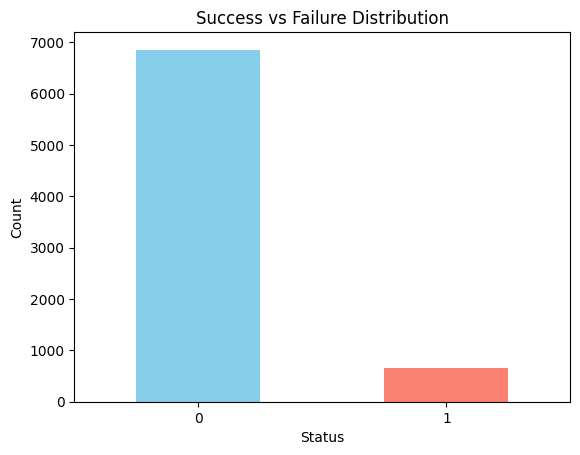

In [172]:
#this class distribution shows that 'status' is highly imbalanced
#i have to deal with it later
data_mapped['status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Success vs Failure Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**Correlation Heatmap**

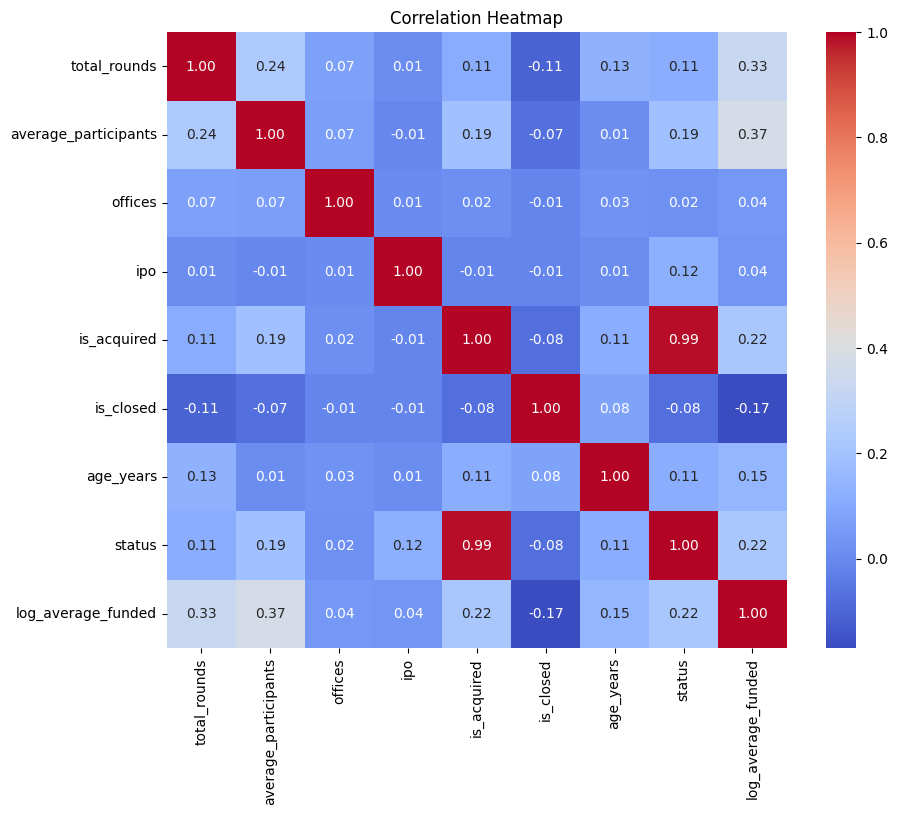

In [164]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_mapped.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**Distribution of Key Features**

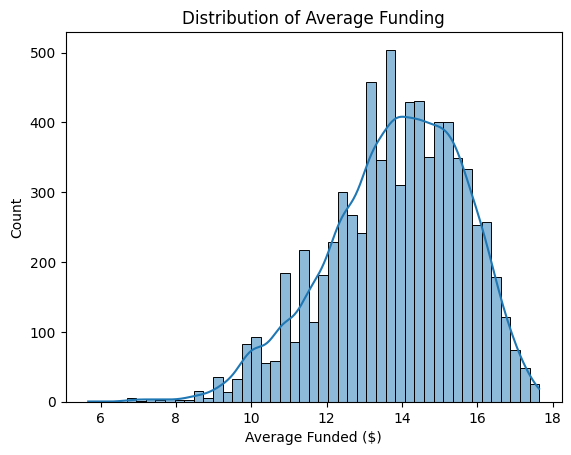

In [166]:
#distribution of average funding
sns.histplot(data_mapped['log_average_funded'], kde=True)
plt.title('Distribution of Average Funding')
plt.xlabel('Average Funded ($)')
plt.savefig('average_funding_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

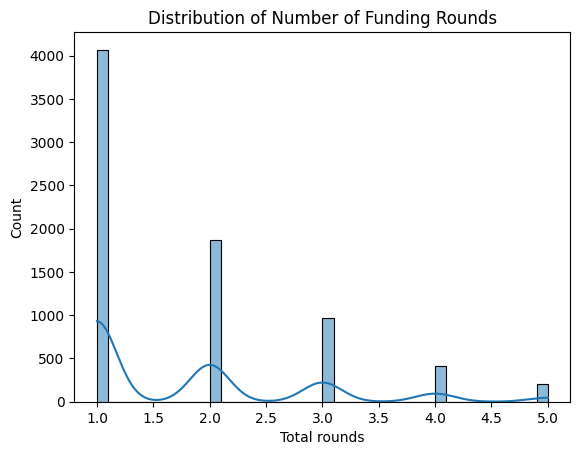

In [174]:
#distribution of funding rounds
sns.histplot(data_mapped['total_rounds'], kde=True)
plt.title('Distribution of Number of Funding Rounds')
plt.xlabel('Total rounds')
plt.savefig('funding_rounds_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

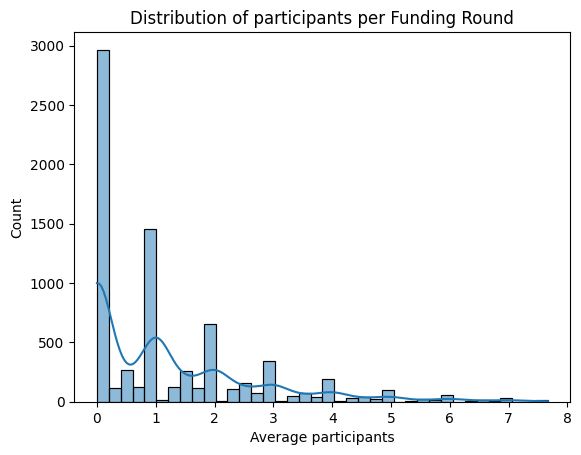

In [176]:
#distribution of participants per funding round
sns.histplot(data_mapped['average_participants'], kde=True)
plt.title('Distribution of participants per Funding Round')
plt.xlabel('Average participants')
plt.savefig('average_participants_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

**Regression itself**

In [76]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_average_funded   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     346.0
Date:                Thu, 24 Jul 2025   Prob (F-statistic):               0.00
Time:                        17:29:18   Log-Likelihood:                -13994.
No. Observations:                7510   AIC:                         2.800e+04
Df Residuals:                    7502   BIC:                         2.806e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9430      0.091    131.291      0.000      11.765      12.121
total_rounds             0.3729      0.018     20.577      0.000       0.337       0.408
average_participants     0.3568      0.013     27.688      0.000       0.332       0.382
offices                 -0.0009      0.046     -0.019      0.985      -0.092       0.090
ipo                      0.9696      0.315      3.083      0.002       0.353       1.586
is_acquired             -0.1184      0.163     -0.728      0.466      -0.437       0.200
is_closed               -0.8761      0.071    -12.352      0.000      -1.015      -0.737
age_years                0.1784      0.016     11.217      0.000       0.147       0.210
status                   0.8512      0.159      5.359      0.000       0.540       1.163
==============================================================================
Omnibus:                      219.792   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.343
Skew:                          -0.402   Prob(JB):                     5.30e-54
Kurtosis:                       3.369   Cond. No.                     1.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
#export cleaned data from jupyter
data_mapped.to_csv('cleaned_startup_data.csv', index=False)